In [86]:
#Import Statements
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, losses

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (precision_recall_curve, average_precision_score, PrecisionRecallDisplay)
from sklearn.metrics import balanced_accuracy_score

import keras
from keras import layers


## ECFP Featuriser

In [3]:
#ECFP featuriser - splitting the training dataset into smaller datasets
tasks, datasets, transformers = dc.molnet.load_tox21(
    featurizer=dc.feat.CircularFingerprint(),
    save_dir=r'C:\Users\ym20201\Documents\Datasets',
    data_dir=r'C:\Users\ym20201\Documents\Datasets')

# featurizer = dc.feat.CircularFingerprint(size=2048, radius=4)
splitter = dc.splits.RandomSplitter()

# train_data, valid_data,test_data = splitter.train_valid_test_split(
#     datasets[0], 
#     frac_train = 0.8, frac_valid = 0.08, frac_test = 0.12)

train_data, valid_data,test_data = datasets

In [4]:
# train_data

In [5]:
# valid_data

In [10]:
len(valid_data.X[3])

2048

In [4]:
# #Workshop model
# ECFP_model = dc.models.MultitaskClassifier(
#     n_tasks = len(tasks),
#     n_features = len(valid_data.X[3]),
#     layer_sizes=[500,200], # how many layers and how many units in each layer to have.
#     weight_init_stddevs=0.02, 
#     bias_init_consts=1.0,
#     weight_decay_penalty=0.0,
#     weight_decay_penalty_type='12',
#     dropouts=[0.5,0.0],
#     activation_fns=['relu'],  
#     n_classes=12,
#     learning_rate=0.01,
#     batch_size=100)

In [51]:
#Model 1
ecfp_model1 = dc.models.MultitaskClassifier(
    n_tasks = len(tasks),
    n_features = len(valid_data.X[3]),
    layer_sizes=[500,200], # how many layers and how many units in each layer to have.
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=[0.5,0.0],
    activation_fns=['relu'],  
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [52]:
#Model 2
ecfp_model2 = dc.models.MultitaskClassifier(
    n_tasks = len(tasks),
    n_features = len(valid_data.X[3]),
    layer_sizes=[1000,500], # how many layers and how many units in each layer to have.
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=[0.5,0.0],
    activation_fns=['relu'],  
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [53]:
#Model 3
ecfp_model3 = dc.models.MultitaskClassifier(
    n_tasks = len(tasks),
    n_features = len(valid_data.X[3]),
    layer_sizes=[1000,500,200], # how many layers and how many units in each layer to have.
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=[0.5,0.0,0.0],
    activation_fns=['relu'],  
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [54]:
#Model 4
ecfp_model4 = dc.models.MultitaskClassifier(
    n_tasks = len(tasks),
    n_features = len(valid_data.X[3]),
    layer_sizes=[1000,500,200], # how many layers and how many units in each layer to have.
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=[0.8,0.5,0.0],
    activation_fns=['relu'],  
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [55]:
#Model 5
ecfp_model5 = dc.models.MultitaskClassifier(
    n_tasks = len(tasks),
    n_features = len(valid_data.X[3]),
    layer_sizes=[500,500,200], # how many layers and how many units in each layer to have.
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=[0.8,0.5,0.0],
    activation_fns=['relu'],  
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [56]:
#Model 6
ecfp_model6 = dc.models.MultitaskClassifier(
    n_tasks = len(tasks),
    n_features = len(valid_data.X[3]),
    layer_sizes=[500,500,200], # how many layers and how many units in each layer to have.
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=[0.5,0.0,0.0],
    activation_fns=['relu'],  
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [57]:
#Model 7
ecfp_model7 = dc.models.MultitaskClassifier(
    n_tasks = len(tasks),
    n_features = len(valid_data.X[3]),
    layer_sizes=[500,500], # how many layers and how many units in each layer to have.
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    weight_decay_penalty=0.0,
    weight_decay_penalty_type='12',
    dropouts=[0.5,0.0],
    activation_fns=['relu'],  
    n_classes=12,
    learning_rate=0.01,
    batch_size=100)

In [58]:
ecfp_model2.fit(train_data,
              nb_epoch=10)

ecfp_model4.fit(train_data,
              nb_epoch=10)

ecfp_model5.fit(train_data,
              nb_epoch=10)

0.8323036193847656

In [13]:
# patience =1
# nb_epochs = 10

# roc_metric = dc.metrics.Metric(dc.metrics.roc_auc_score) #doesnt work
acc_metric = dc.metrics.Metric(dc.metrics.balanced_accuracy_score)
recall_metric = dc.metrics.Metric(dc.metrics.recall_score)
# topk_acc_metric = dc.metrics.Metric(dc.metrics.top_k_accuracy_score)
metric3 = dc.metrics.Metric(dc.metrics.f1_score)


# callback = dc.models.ValidationCallback(
#             valid_data,
#             patience,
#             metrics=metric)

In [49]:
ecfp_model7.evaluate(test_data, [acc_metric, recall_metric, metric3], transformers)

{'balanced_accuracy_score': 0.6143732027894923,
 'recall_score': 0.31959507209984855,
 'f1_score': 0.2596440850461987}

In [59]:
m2_ecfp_pred = ecfp_model2.predict(test_data)
m4_ecfp_pred = ecfp_model4.predict(test_data)
m5_ecfp_pred = ecfp_model5.predict(test_data)

In [11]:
#Function for accessing y_true of each assay
def y_true(assay_num, test_data):
    y_true = []
    for i in range(len(test_data.y)):
        y_true.append(test_data.y[i][assay_num - 1])
        
    return y_true

def y_pred(assay_num, pred_data):
    y_pred = []
    for i in range(len(pred_data)):
        y_pred.append( pred_data[i][assay_num - 1][0])
#         y_pred = pred_data[i][assay_num - 1] #not sure which one
    
    return y_pred

In [61]:
#y_true of each assay
y_true_1 = y_true(1, test_data)
y_true_2 = y_true(2, test_data)
y_true_3 = y_true(3, test_data)
y_true_4 = y_true(4, test_data)
y_true_5 = y_true(5, test_data)
y_true_6 = y_true(6, test_data)
y_true_7 = y_true(7, test_data)
y_true_8 = y_true(8, test_data)
y_true_9 = y_true(9, test_data)
y_true_10 = y_true(10, test_data)
y_true_11 = y_true(11, test_data)
y_true_12 = y_true(12, test_data)

y_true = [y_true_1, y_true_2, y_true_3, y_true_4, y_true_5, 
        y_true_6, y_true_7, y_true_8, y_true_9, y_true_10,
        y_true_11, y_true_12]

### Model 2 - y_pred

In [62]:
#y_pred of each assay
m2_y_pred_1 = y_pred(1, m2_ecfp_pred)
m2_y_pred_2 = y_pred(2, m2_ecfp_pred)
m2_y_pred_3 = y_pred(3, m2_ecfp_pred)
m2_y_pred_4 = y_pred(4, m2_ecfp_pred)
m2_y_pred_5 = y_pred(5, m2_ecfp_pred)
m2_y_pred_6 = y_pred(6, m2_ecfp_pred)
m2_y_pred_7 = y_pred(7, m2_ecfp_pred)
m2_y_pred_8 = y_pred(8, m2_ecfp_pred)
m2_y_pred_9 = y_pred(9, m2_ecfp_pred)
m2_y_pred_10 = y_pred(10, m2_ecfp_pred)
m2_y_pred_11 = y_pred(11, m2_ecfp_pred)
m2_y_pred_12 = y_pred(12, m2_ecfp_pred)

In [63]:
def round_pred(y_pred):
    y_pred_new = []
    for i in range(len(y_pred)):
        if y_pred[i] < 0.5:
            new = 0
        else:
            new = 1
        y_pred_new.append(new)
    return y_pred_new

In [64]:
#Rounding predicted probabilities to binary values
m2_y_pred_new_1 = round_pred(m2_y_pred_1)
m2_y_pred_new_2 = round_pred(m2_y_pred_2)
m2_y_pred_new_3 = round_pred(m2_y_pred_3)
m2_y_pred_new_4 = round_pred(m2_y_pred_4)
m2_y_pred_new_5 = round_pred(m2_y_pred_5)
m2_y_pred_new_6 = round_pred(m2_y_pred_6)
m2_y_pred_new_7= round_pred(m2_y_pred_7)
m2_y_pred_new_8 = round_pred(m2_y_pred_8)
m2_y_pred_new_9 = round_pred(m2_y_pred_9)
m2_y_pred_new_10 = round_pred(m2_y_pred_10)
m2_y_pred_new_11 = round_pred(m2_y_pred_11)
m2_y_pred_new_12 = round_pred(m2_y_pred_12)

In [66]:
m2_y_pred = [m2_y_pred_1, m2_y_pred_2, m2_y_pred_3, m2_y_pred_4, m2_y_pred_5, 
             m2_y_pred_6, m2_y_pred_7, m2_y_pred_8, m2_y_pred_9, m2_y_pred_10,
            m2_y_pred_11, m2_y_pred_12]

m2_y_pred_new = [m2_y_pred_new_1, m2_y_pred_new_2, m2_y_pred_new_3, m2_y_pred_new_4, m2_y_pred_new_5, 
             m2_y_pred_new_6, m2_y_pred_new_7, m2_y_pred_new_8, m2_y_pred_new_9, m2_y_pred_new_10,
            m2_y_pred_new_11, m2_y_pred_new_12]

### Model 4 - y_pred

In [67]:
#y_pred of each assay
m4_y_pred_1 = y_pred(1, m4_ecfp_pred)
m4_y_pred_2 = y_pred(2, m4_ecfp_pred)
m4_y_pred_3 = y_pred(3, m4_ecfp_pred)
m4_y_pred_4 = y_pred(4, m4_ecfp_pred)
m4_y_pred_5 = y_pred(5, m4_ecfp_pred)
m4_y_pred_6 = y_pred(6, m4_ecfp_pred)
m4_y_pred_7 = y_pred(7, m4_ecfp_pred)
m4_y_pred_8 = y_pred(8, m4_ecfp_pred)
m4_y_pred_9 = y_pred(9, m4_ecfp_pred)
m4_y_pred_10 = y_pred(10, m4_ecfp_pred)
m4_y_pred_11 = y_pred(11, m4_ecfp_pred)
m4_y_pred_12 = y_pred(12, m4_ecfp_pred)

In [68]:
#Rounding predicted probabilities to binary values
m4_y_pred_new_1 = round_pred(m4_y_pred_1)
m4_y_pred_new_2 = round_pred(m4_y_pred_2)
m4_y_pred_new_3 = round_pred(m4_y_pred_3)
m4_y_pred_new_4 = round_pred(m4_y_pred_4)
m4_y_pred_new_5 = round_pred(m4_y_pred_5)
m4_y_pred_new_6 = round_pred(m4_y_pred_6)
m4_y_pred_new_7= round_pred(m4_y_pred_7)
m4_y_pred_new_8 = round_pred(m4_y_pred_8)
m4_y_pred_new_9 = round_pred(m4_y_pred_9)
m4_y_pred_new_10 = round_pred(m4_y_pred_10)
m4_y_pred_new_11 = round_pred(m4_y_pred_11)
m4_y_pred_new_12 = round_pred(m4_y_pred_12)

In [69]:
m4_y_pred = [m4_y_pred_1, m4_y_pred_2, m4_y_pred_3, m4_y_pred_4, m4_y_pred_5, 
             m4_y_pred_6, m4_y_pred_7, m4_y_pred_8, m4_y_pred_9, m4_y_pred_10,
            m4_y_pred_11, m4_y_pred_12]

m4_y_pred_new = [m4_y_pred_new_1, m4_y_pred_new_2, m4_y_pred_new_3, m4_y_pred_new_4, m4_y_pred_new_5, 
             m4_y_pred_new_6, m4_y_pred_new_7, m4_y_pred_new_8, m4_y_pred_new_9, m4_y_pred_new_10,
            m4_y_pred_new_11, m4_y_pred_new_12]

### Model 5 - y_pred

In [70]:
#y_pred of each assay
m5_y_pred_1 = y_pred(1, m5_ecfp_pred)
m5_y_pred_2 = y_pred(2, m5_ecfp_pred)
m5_y_pred_3 = y_pred(3, m5_ecfp_pred)
m5_y_pred_4 = y_pred(4, m5_ecfp_pred)
m5_y_pred_5 = y_pred(5, m5_ecfp_pred)
m5_y_pred_6 = y_pred(6, m5_ecfp_pred)
m5_y_pred_7 = y_pred(7, m5_ecfp_pred)
m5_y_pred_8 = y_pred(8, m5_ecfp_pred)
m5_y_pred_9 = y_pred(9, m5_ecfp_pred)
m5_y_pred_10 = y_pred(10, m5_ecfp_pred)
m5_y_pred_11 = y_pred(11, m5_ecfp_pred)
m5_y_pred_12 = y_pred(12, m5_ecfp_pred)

In [71]:
#Rounding predicted probabilities to binary values
m5_y_pred_new_1 = round_pred(m5_y_pred_1)
m5_y_pred_new_2 = round_pred(m5_y_pred_2)
m5_y_pred_new_3 = round_pred(m5_y_pred_3)
m5_y_pred_new_4 = round_pred(m5_y_pred_4)
m5_y_pred_new_5 = round_pred(m5_y_pred_5)   
m5_y_pred_new_6 = round_pred(m5_y_pred_6)
m5_y_pred_new_7= round_pred(m5_y_pred_7)
m5_y_pred_new_8 = round_pred(m5_y_pred_8)
m5_y_pred_new_9 = round_pred(m5_y_pred_9)
m5_y_pred_new_10 = round_pred(m5_y_pred_10)
m5_y_pred_new_11 = round_pred(m5_y_pred_11)
m5_y_pred_new_12 = round_pred(m5_y_pred_12)

In [72]:
m5_y_pred = [m5_y_pred_1, m5_y_pred_2, m5_y_pred_3, m5_y_pred_4, m5_y_pred_5, 
             m5_y_pred_6, m5_y_pred_7, m5_y_pred_8, m5_y_pred_9, m5_y_pred_10,
            m5_y_pred_11, m5_y_pred_12]

m5_y_pred_new = [m5_y_pred_new_1, m5_y_pred_new_2, m5_y_pred_new_3, m5_y_pred_new_4, m5_y_pred_new_5, 
             m5_y_pred_new_6, m5_y_pred_new_7, m5_y_pred_new_8, m5_y_pred_new_9, m5_y_pred_new_10,
            m5_y_pred_new_11, m5_y_pred_new_12]

## Evaluating the model
### Precision and Recall score

In [73]:
#Function to ouput precision, recall, and average precision score
def precision_recall_avgprecision(y_true, y_pred):
    precision_score = []
    recall_score = []
    avg_precision_score = []
    for i in range(len(y_true)):
        precision, recall, _ = precision_recall_curve(y_true[i], y_pred[i])
        avg_precision = average_precision_score(y_true[i], y_pred[i])
        
        precision_score.append(precision)
        recall_score.append(recall)
        avg_precision_score.append(avg_precision)
    
    return precision_score, recall_score, avg_precision_score


In [74]:
def PrecisionRecallPlot(precision, recall, avg, assays):
    precision_recall = []
    for i in range(len(precision)):
        plot = PrecisionRecallDisplay(recall = recall[i], precision = precision[i], average_precision = avg[i])
        precision_recall.append(plot)
        
    for i in range(len(precision_recall)):
        precision_recall[i].plot(ax=ax, label=assays[i])

In [76]:
m2_precision_score, m2_recall_score, m2_avg_precision_score = precision_recall_avgprecision(y_true, m2_y_pred)
m4_precision_score, m4_recall_score, m4_avg_precision_score = precision_recall_avgprecision(y_true, m4_y_pred)
m5_precision_score, m5_recall_score, m5_avg_precision_score = precision_recall_avgprecision(y_true, m5_y_pred)

In [77]:
assays = ['NR-AR', 'NR-AR-LBD','NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
         'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

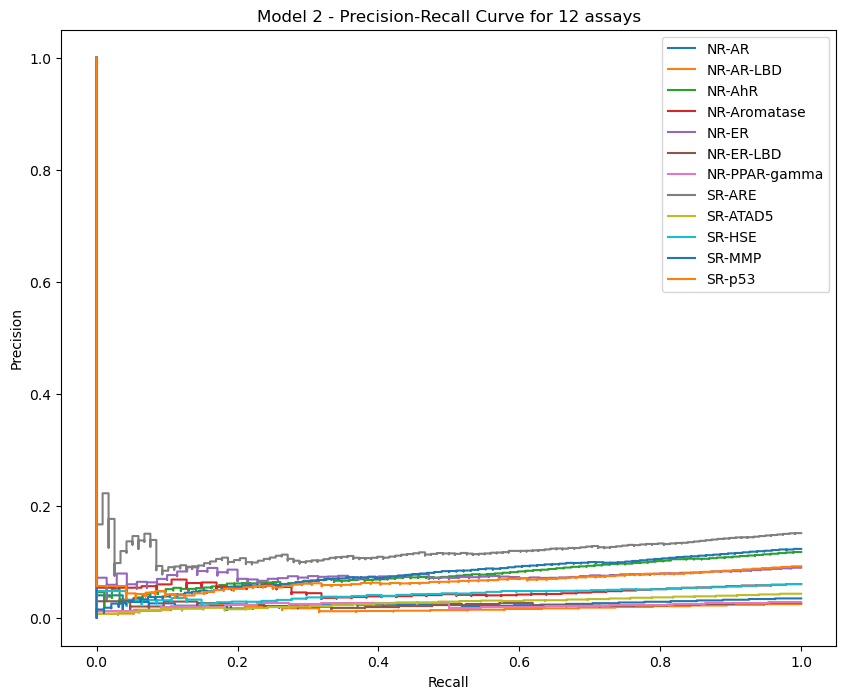

In [78]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m2_precision_score, m2_recall_score, m2_avg_precision_score, assays)

plt.title('Model 2 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')

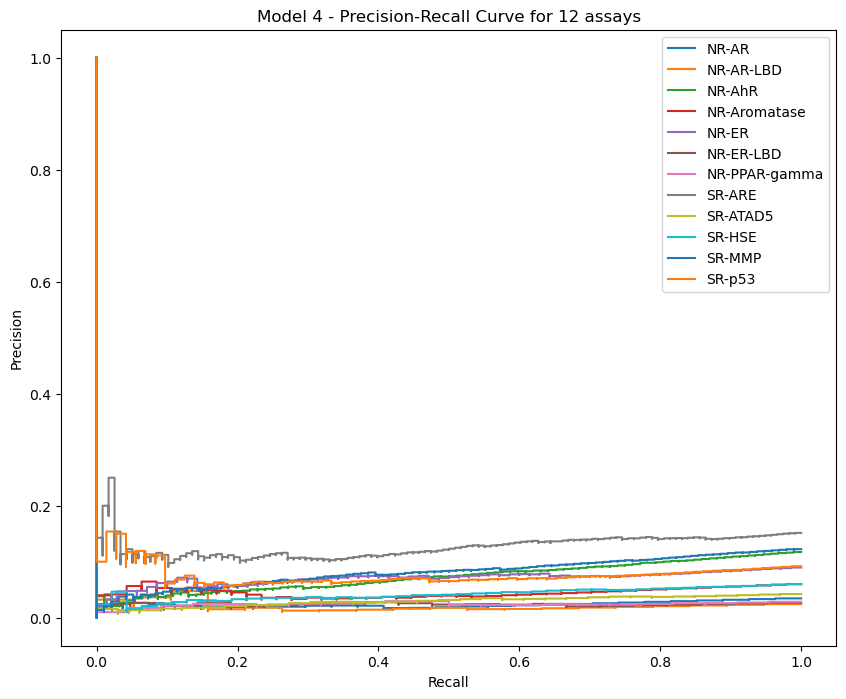

In [79]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m4_precision_score, m4_recall_score, m4_avg_precision_score, assays)

plt.title('Model 4 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')

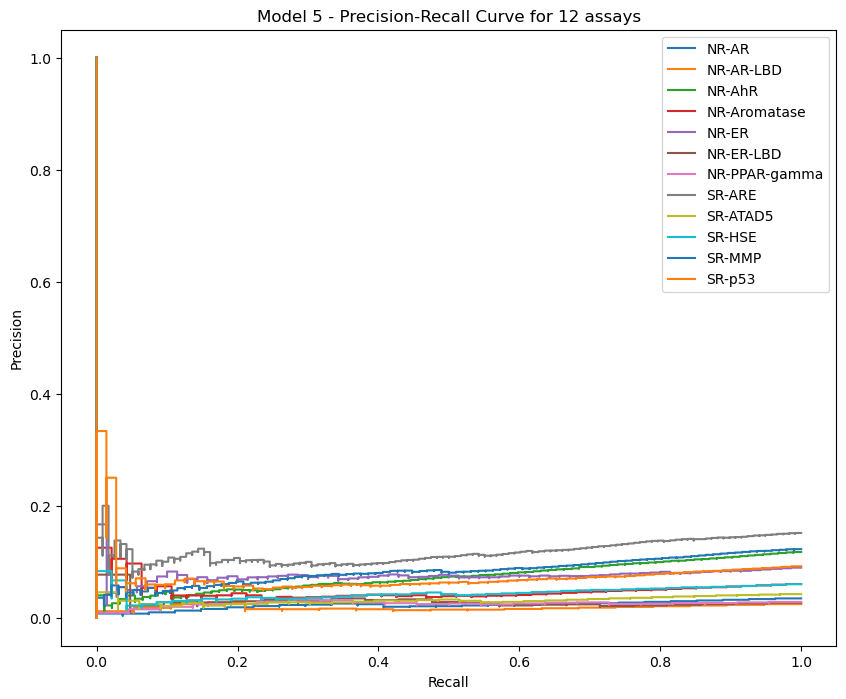

In [80]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m5_precision_score, m5_recall_score, m5_avg_precision_score, assays)

plt.title('Model 5 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')

### Balanced Accuracy Score

In [87]:
def balanced_accuracy(y_true, y_pred):
    balanced_acc = []
    for i in range(len(y_true)):
        b_acc = balanced_accuracy_score(y_true[i], y_pred[i])
        balanced_acc.append(b_acc)
    return balanced_acc

In [89]:
m2_balanced_acc = balanced_accuracy(y_true, m2_y_pred_new)
m4_balanced_acc = balanced_accuracy(y_true, m4_y_pred_new)
m5_balanced_acc = balanced_accuracy(y_true, m5_y_pred_new)

In [124]:
b_acc_means = [np.mean(m2_balanced_acc), np.mean(m4_balanced_acc), np.mean(m5_balanced_acc)]
b_acc_means

[0.3797605587394395, 0.38202467841868465, 0.3770774991556724]

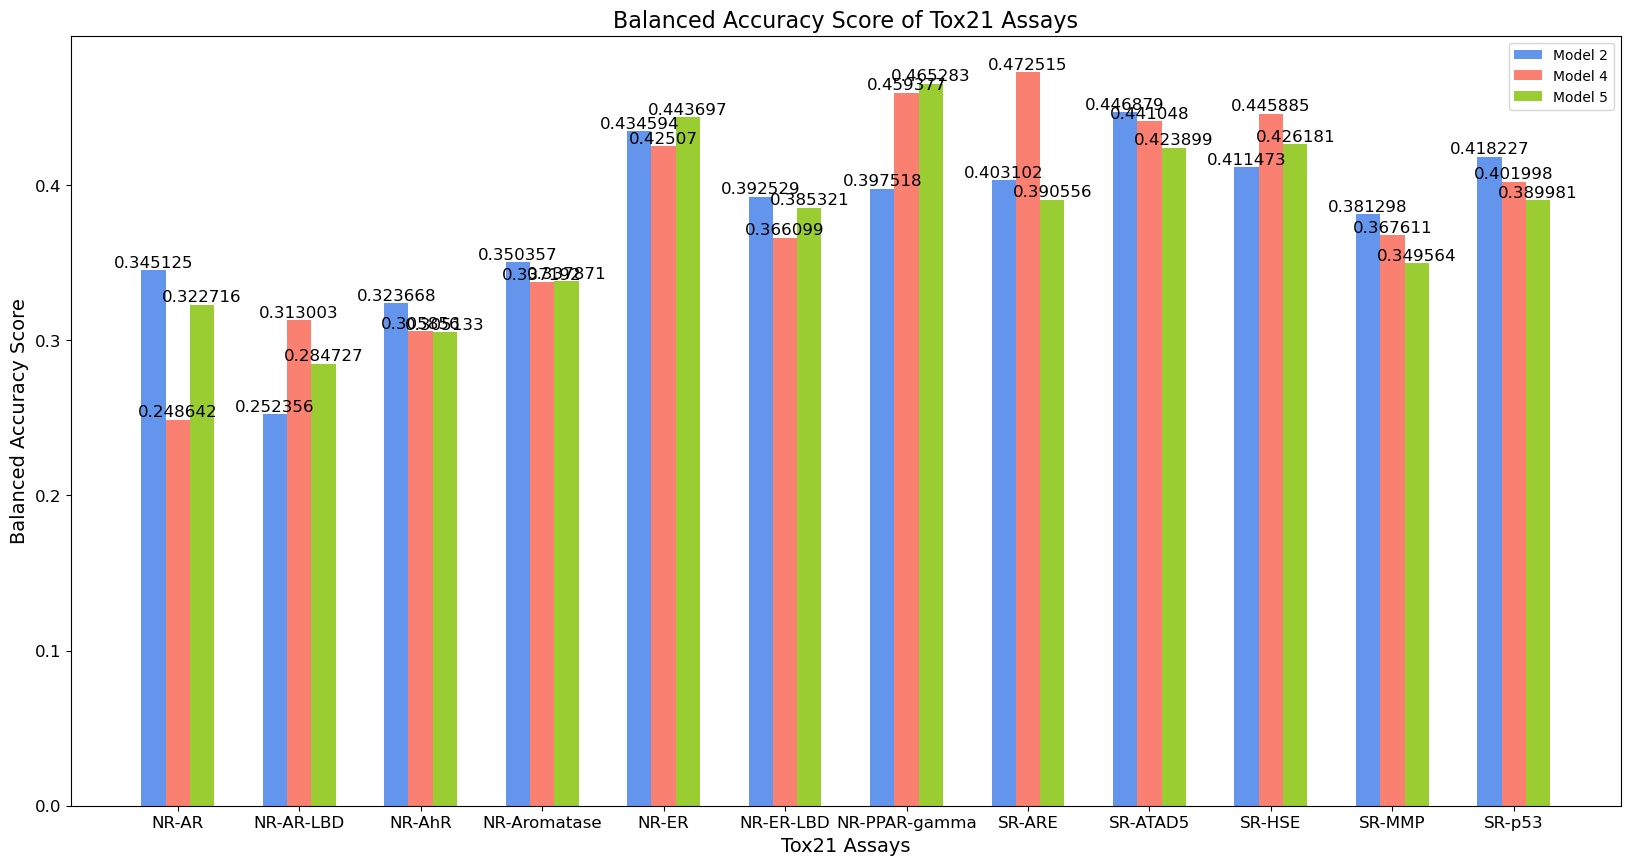

In [115]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_balanced_acc, width, label='Model 2', color='cornflowerblue')
plt.bar(x, m4_balanced_acc, width, label='Model 4', color='salmon')
plt.bar(x+0.2, m5_balanced_acc, width, label='Model 5', color='yellowgreen')
plt.title('Balanced Accuracy Score of Tox21 Assays', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
plt.bar_label(ax.containers[0], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[1], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[2], label_type='edge', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

### F1-Score

In [92]:
def f1Score(y_true, y_pred):
    f1_Score = []
    for i in range(len(y_true)):
        f1 = f1_score(y_true[i], y_pred[i])
        f1_Score.append(f1)
    return f1_Score

In [93]:
m2_f1 = f1Score(y_true, m2_y_pred_new)
m4_f1 = f1Score(y_true, m4_y_pred_new)
m5_f1 = f1Score(y_true, m5_y_pred_new)

In [123]:
f1_means = [np.mean(m2_f1), np.mean(m4_f1), np.mean(m5_f1)]
f1_means

[0.09515468538356875, 0.09587935188952541, 0.09160136338195934]

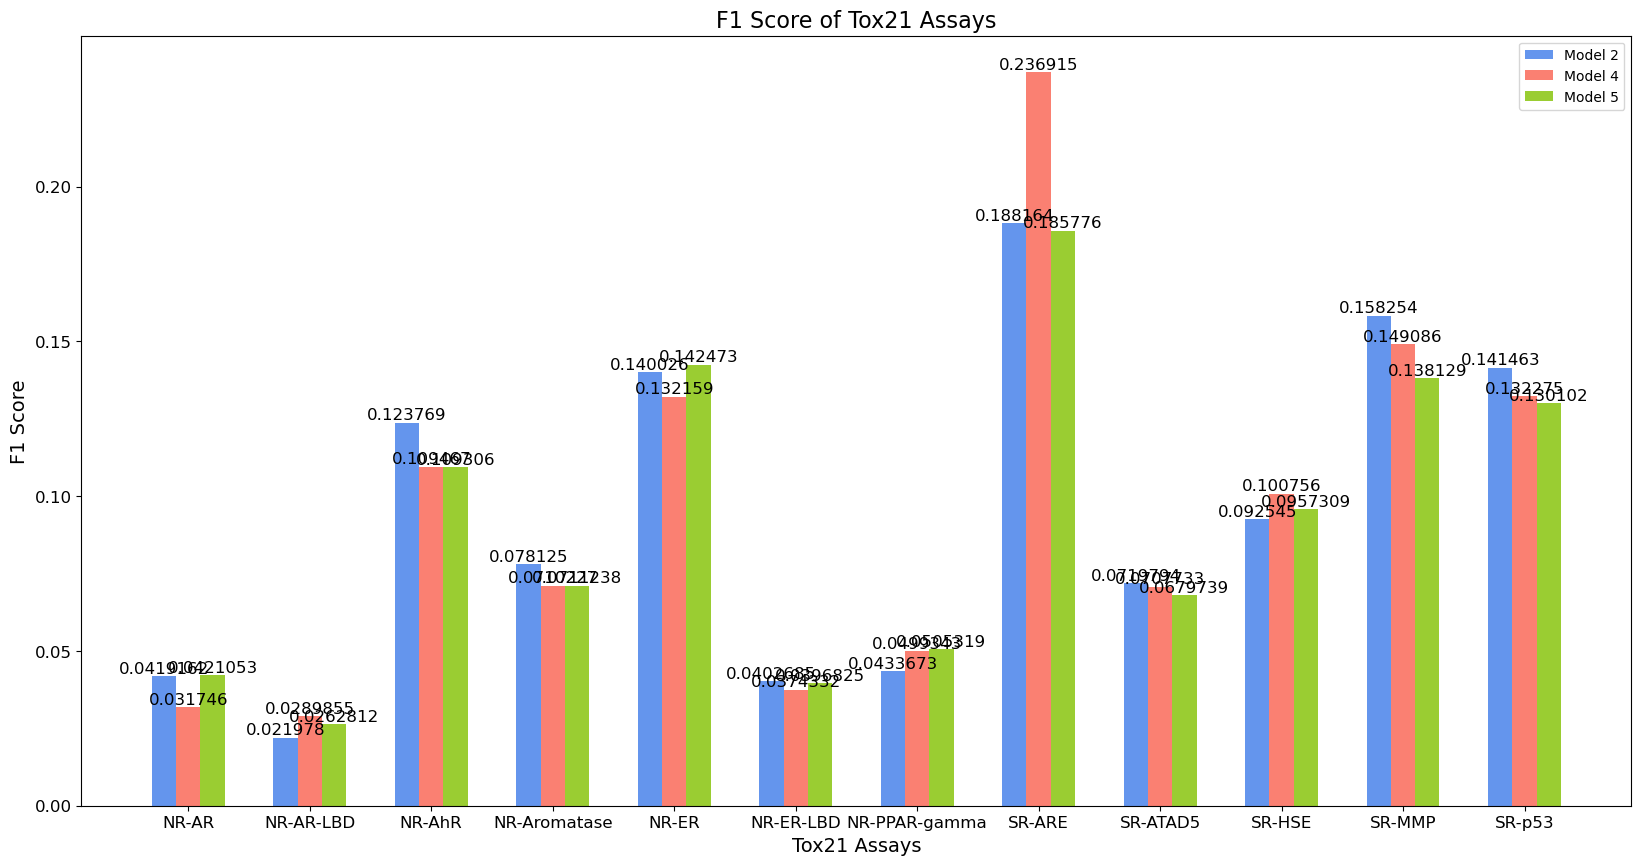

In [116]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_f1, width, label='Model 2', color='cornflowerblue')
plt.bar(x, m4_f1, width, label='Model 4', color='salmon')
plt.bar(x+0.2, m5_f1, width, label='Model 5', color='yellowgreen')

plt.title('F1 Score of Tox21 Assays', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
plt.bar_label(ax.containers[0], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[1], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[2], label_type='edge', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

### ROC-AUC Score

In [96]:
# Area Under the Receiver Operating Characteristic(ROC) Curve
def roc_auc(y_true, y_pred):
    rocauc=[]
    for i in range(len(y_true)):
        auroc = roc_auc_score(y_true[i], y_pred[i])
        rocauc.append(auroc)
    return rocauc

In [97]:
m2_roc_auc = roc_auc(y_true, m2_y_pred_new)
m4_roc_auc = roc_auc(y_true, m4_y_pred_new)
m5_roc_auc = roc_auc(y_true, m5_y_pred_new)

In [122]:
roc_means = [np.mean(m2_roc_auc), np.mean(m4_roc_auc), np.mean(m5_roc_auc)]
roc_means

[0.3797605587394394, 0.38202467841868465, 0.3770774991556724]

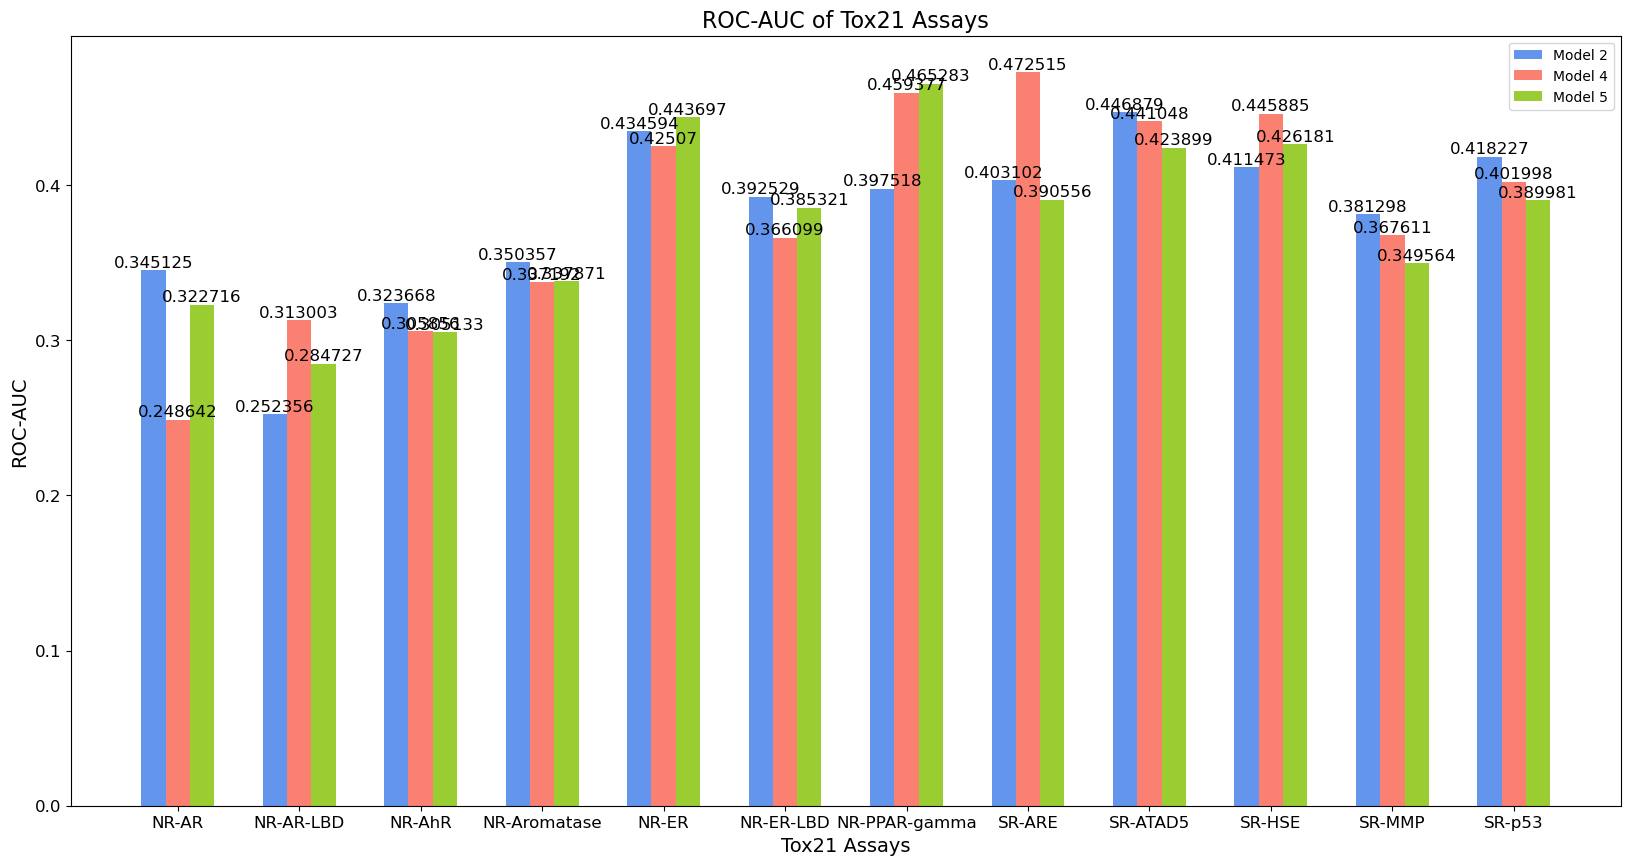

In [118]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))
width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_roc_auc, width, label='Model 2', color='cornflowerblue')
plt.bar(x, m4_roc_auc, width, label='Model 4', color='salmon')
plt.bar(x+0.2, m5_roc_auc, width, label='Model 5', color='yellowgreen')

plt.title('ROC-AUC of Tox21 Assays', fontsize=16)
plt.ylabel('ROC-AUC', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)
plt.bar_label(ax.containers[0], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[1], label_type='edge', fontsize=12)
plt.bar_label(ax.containers[2], label_type='edge', fontsize=12)
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

### Keras model

In [40]:
model = Sequential()
model.add(layers.Conv2D(filters=32,
                          kernel_size=3,
                          activation='relu',
                          dilation_rate=2,
                             input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
#dropout to avoid overfitting
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))

model.build()

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 76, 76, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 38, 32)       0         
 )                                                               
                                                                 
 dense_33 (Dense)            (None, 38, 38, 50)        1650      
                                                                 
 dense_34 (Dense)            (None, 38, 38, 1)         51        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(x=train_data,
                epochs=10,
                batch_size=512,
                shuffle=True,
               validation_data=(valid_data))

ValueError: Failed to find data adapter that can handle input: <class 'deepchem.data.datasets.DiskDataset'>, <class 'NoneType'>